In [1]:
%matplotlib widget
# %matplotlib qt
from bmcs_shell.api import *
import numpy as np
import k3d
import matplotlib.pyplot as plt

## Old tested WB shell

In [ ]:
tested_wb_shell = dict(a =125,  b = 550, c = 175, gamma=np.deg2rad(46), n_phi_plus=3, n_x_plus=2, wireframe_width=5, 
                         trim_half_cells_along_y=True,
                         trim_half_cells_along_x=True,
                         align_outer_nodes_along_x=True)
wbt4p = WBTessellation4P(**tested_wb_shell)
wbt4p.interact()

In [ ]:
wb_p.get_shell_height(wbt4p)

In [ ]:
wb_p.get_shell_width(wbt4p)

In [ ]:
wb_p.get_span(wbt4p)

In [ ]:
wbt4p.wb_cell.R_0

In [ ]:
WBGeoUtils.export_obj_file(wbt4p, 'wb_tested_3cells_mid_shifted.obj')

## Parametric study

In [ ]:
wb_p = WbParamDesigner(n=100, 
         n_mid_cells=3,
         a_range = [150, 175, 200],
         gamma_range=np.linspace(10, 85, 50),
         var1={'name':'span', 'value':1800},
         var2={'name':'height', 'value':300}, # r/s = 1/4.5
         var3={'name':'width', 'value':500})
valid_params = wb_p.calc_valid_params()
# wb_p.plot_eta_zeta_var1(a_i=0, gamma_i=0)

In [ ]:
# Remove not valid solutions
# fig, ax = plt.subplots()
# no_nan_valid_params = []
# for i, params in enumerate(valid_params):
#     if not np.isnan(list(params.values())).any():
#         no_nan_valid_params.append(params)
# no_nan_valid_params

In [2]:
valid_params_3_cells_span_1800_height_300_width_500= [{'a': 50.0, 'b': 323.57020414338484, 'c': 203.9192890522306, 'gamma': 1.3743265742309068, 'n_phi_plus': 4}, 
 {'a': 75.0, 'b': 324.1608857200621, 'c': 180.49944236370612, 'gamma': 1.3233110805408672, 'n_phi_plus': 4}, 
 {'a': 100.0, 'b': 325.33872887313026, 'c': 158.69006461083, 'gamma': 1.2382830350132779, 'n_phi_plus': 4}, 
 {'a': 125.0, 'b': 328.12276264060944, 'c': 141.44420701221793, 'gamma': 1.0837971138401712, 'n_phi_plus': 4},
 {'a': 150.0, 'b': 334.9625169740877, 'c': 138.40994828897482, 'gamma': 0.8074604501704515, 'n_phi_plus': 4}, 
 {'a': 175.0, 'b': 350.5894897509128, 'c': 159.8911507701505, 'gamma': 0.4883166638254845, 'n_phi_plus': 4}, 
 {'a': 200.0, 'b': 373.19740961906575, 'c': 197.3843628100437, 'gamma': 0.2561290337283894, 'n_phi_plus': 4}]

valid_params_2_cells_span_1800_height_300_width_500= [{'a': 50.0, 'b': 488.7096992126691, 'c': 219.35035456988965, 'gamma': 1.1474627907495765, 'n_phi_plus': 3}, 
 {'a': 75.0, 'b': 490.49365795443356, 'c': 201.23489828631506, 'gamma': 1.0544352782787323, 'n_phi_plus': 3}, 
 {'a': 100.0, 'b': 493.47789764898204, 'c': 188.08268555670807, 'gamma': 0.9231728219305352, 'n_phi_plus': 3}, 
 {'a': 125.0, 'b': 498.98924772523196, 'c': 184.16057467325248, 'gamma': 0.7460842175215365, 'n_phi_plus': 3}]

## Planned shell giving the best performance has width = 500, height = 300, span=1800, n_cells = 2,
{'a': 100.0, 'b': 493.47789764898204, 'c': 188.08268555670807, 'gamma': 0.9231728219305352, 'n_phi_plus': 3}
(second one in valid_params_2_cells_span_1800_height_300_width_500)

In [3]:
params = valid_params_2_cells_span_1800_height_300_width_500[2]

In [5]:
wbt4p = WBTessellation4P(
#                          a=100,
#                          b = 5.492 * a,
#                          c = 1.8466 * a,
#                          gamma=np.deg2rad(54.53),
#                          n_phi_plus=3,
                        **params,
                         n_x_plus=2,
                         wireframe_width=5,
                         trim_half_cells_along_y=True,
                         trim_half_cells_along_x=True,
                         align_outer_nodes_along_x=True,
)
wbt4p.interact()

In [6]:
# WBGeoUtils.export_obj_file(wbt4p, 'wb_tested_3cells_mid_shifted.obj')

## Find max. dihedral angle for hinge design

In [7]:
dih_angles, _, _ = wbt4p.get_dih_angles()
np.unique(dih_angles)

array([105.6, 135.3, 142.1, 172.2,   nan])

## Plot folded/unfolded pattern

In [8]:
gamma = params['gamma']

Plot tessellation with gamma= 89.99 °
Plot tessellation with gamma= 89.99 °
Pattern points (in flat unfolded state):
-----------------------------------------------------------
Node num.: Coords. in folded state (x, y, z_diff)
0 :	(0,	493,	0)
1 :	(100,	987,	0)
2 :	(-100,	987,	0)
3 :	(100,	0,	0)
4 :	(-100,	0,	0)
5 :	(188,	493,	0)
6 :	(-188,	493,	0)
7 :	(0,	-493,	0)
8 :	(100,	-987,	0)
9 :	(-100,	-987,	0)
10 :	(188,	-493,	0)
11 :	(-188,	-493,	0)
12 :	(-288,	987,	0)
13 :	(-288,	493,	0)
14 :	(-288,	0,	0)
15 :	(-288,	-493,	0)
16 :	(-288,	-987,	0)
17 :	(288,	987,	0)
18 :	(288,	493,	0)
19 :	(288,	0,	0)
20 :	(288,	-493,	0)
21 :	(288,	-987,	0)


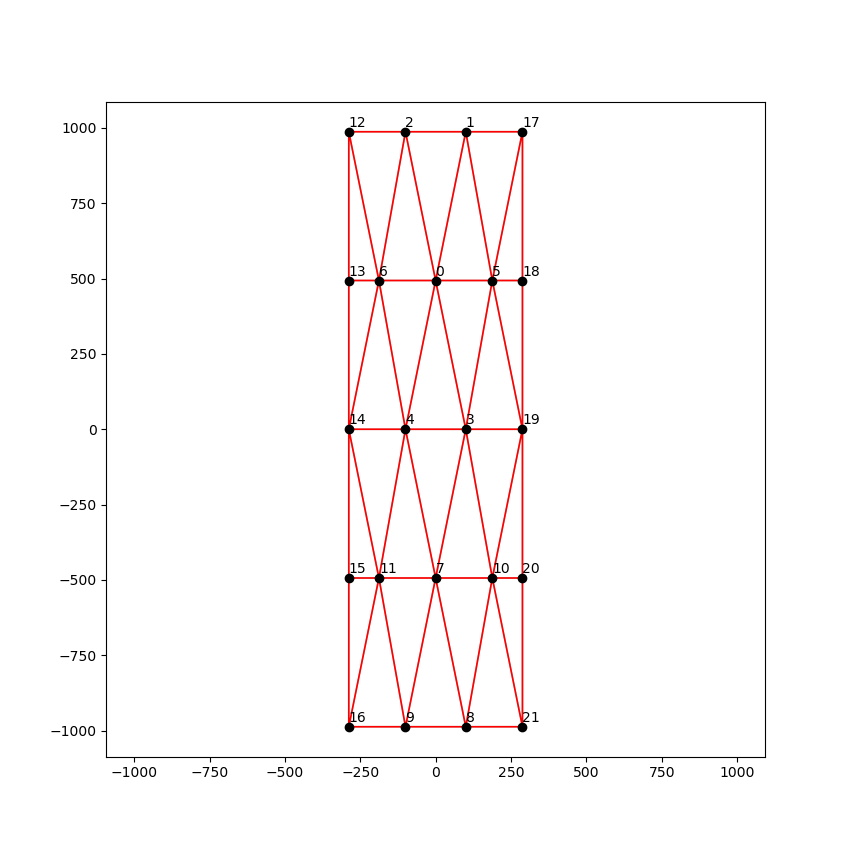

In [9]:
fig_pattern, _ = wbt4p.plot_formwork_plan(trimmed=True, gamma=np.pi/2-0.0001, type='folded')

Plot tessellation with gamma= 89.99 °
Plot tessellation with gamma= 52.89 °
Pattern points (in flat unfolded state):
-----------------------------------------------------------
Node num.: Coords. in folded state (x, y, z_diff)
0 :	(0,	456,	-74)
1 :	(100,	934,	-198)
2 :	(-100,	934,	-198)
3 :	(100,	0,	113)
4 :	(-100,	0,	113)
5 :	(150,	492,	34)
6 :	(-150,	492,	34)
7 :	(0,	-456,	-74)
8 :	(100,	-934,	-198)
9 :	(-100,	-934,	-198)
10 :	(150,	-492,	34)
11 :	(-150,	-492,	34)
12 :	(-250,	866,	-289)
13 :	(-250,	492,	34)
14 :	(-250,	0,	0)
15 :	(-250,	-492,	34)
16 :	(-250,	-866,	-289)
17 :	(250,	866,	-289)
18 :	(250,	492,	34)
19 :	(250,	0,	0)
20 :	(250,	-492,	34)
21 :	(250,	-866,	-289)


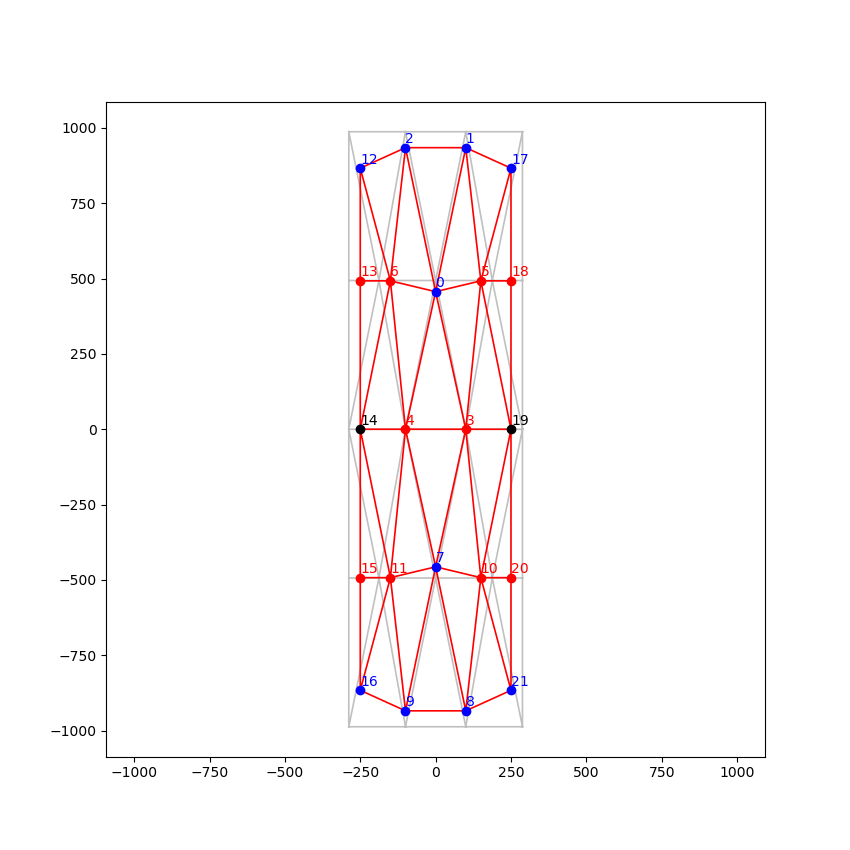

In [10]:
fig_pattern, _ = wbt4p.plot_formwork_plan(trimmed=True, gamma=gamma, type='folded')

Plot tessellation with gamma= 89.99 °
Plot tessellation with gamma= 52.89 °
Fixed nodes list (fixed on bottom fixed plate):
-----------------------------------------------------------
Node num.: Coords. in folded state (x, y, z_diff)
0 :	(0,	456,	215)
1 :	(100,	934,	91)
2 :	(-100,	934,	91)
7 :	(0,	-456,	215)
8 :	(100,	-934,	91)
9 :	(-100,	-934,	91)
12 :	(-250,	866,	0)
16 :	(-250,	-866,	0)
17 :	(250,	866,	0)
21 :	(250,	-866,	0)


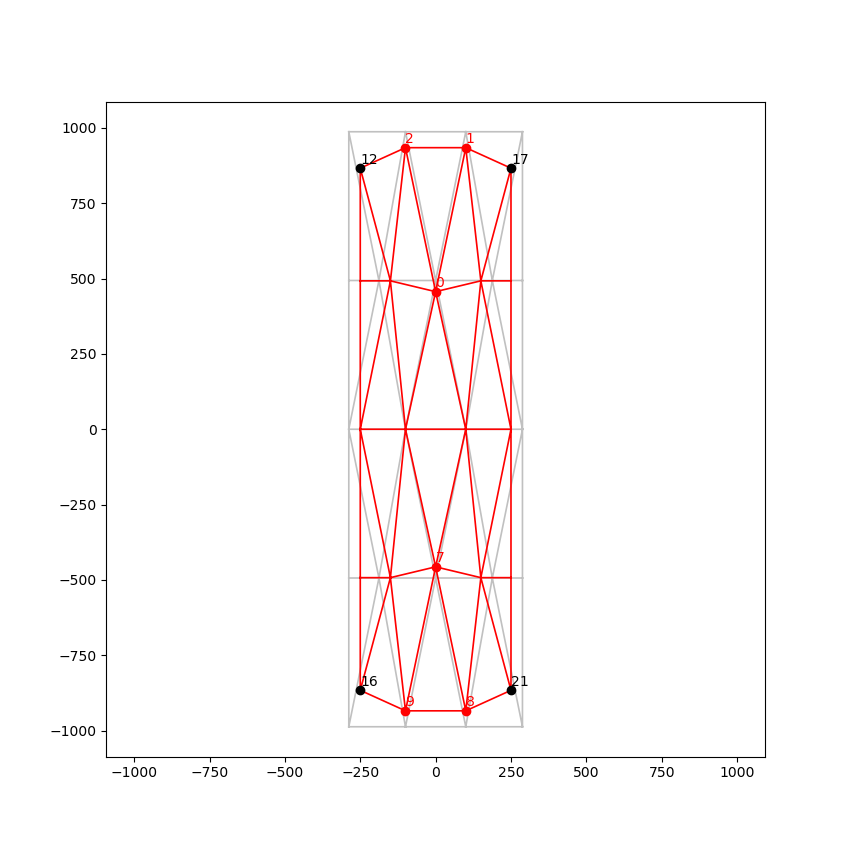

In [11]:
fig_fixed, _ = wbt4p.plot_formwork_plan(trimmed=True, gamma=gamma, type='fixed_base')

Plot tessellation with gamma= 89.99 °
Plot tessellation with gamma= 52.89 °
Moving nodes list (must be raised to fold the shell):
-----------------------------------------------------------
Node num.: Coords. in folded state (x, y, z_diff)
3 :	(100,	0,	113)
4 :	(-100,	0,	113)
5 :	(150,	492,	34)
6 :	(-150,	492,	34)
10 :	(150,	-492,	34)
11 :	(-150,	-492,	34)
13 :	(-250,	492,	34)
14 :	(-250,	0,	0)
15 :	(-250,	-492,	34)
18 :	(250,	492,	34)
19 :	(250,	0,	0)
20 :	(250,	-492,	34)


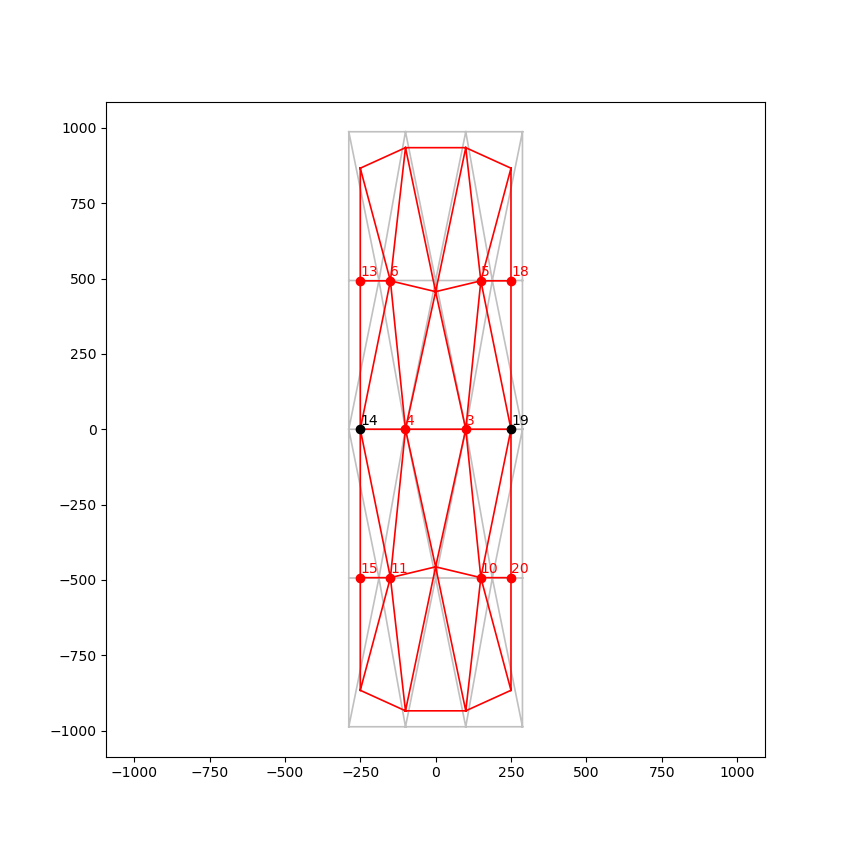

In [12]:
fig_moving, _ = wbt4p.plot_formwork_plan(trimmed=True, gamma=gamma, type='moving_top')

Plot tessellation with gamma= 60.0 °


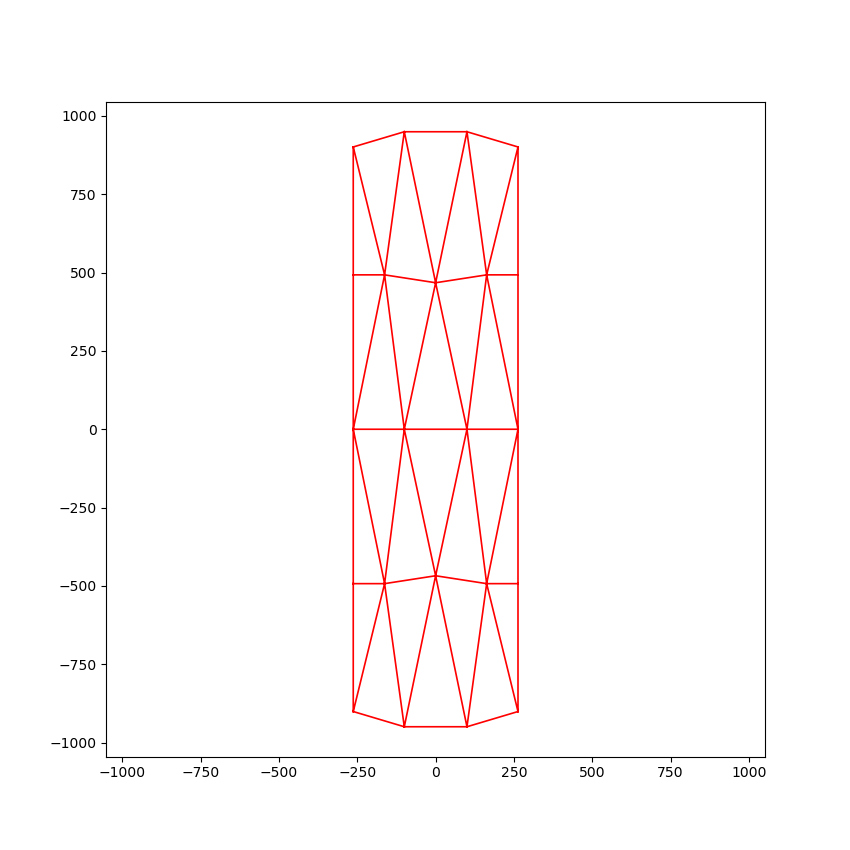

(<Figure size 850x850 with 1 Axes>, <AxesSubplot:>)

In [13]:
wbt4p.plot_folding_pattern(trimmed=True, gamma=np.pi/3, color='red')

In [14]:
fig_pattern.savefig('pattern.pdf')

## Plot points coords diff between flat and folded states

In [15]:
wbt4p.gamma = np.pi/2 - 0.0001
X_Ia0 = wbt4p.X_Ia_trimmed
wbt4p.gamma = gamma
X_Ia1 = wbt4p.X_Ia_trimmed
X_Ia_diff = X_Ia1 - X_Ia0
print('Node num.: Coords. in folded state (x_diff, y_diff, z_diff)')
for i, (x_i, y_i, z_i) in zip(np.arange(X_Ia_diff.shape[0]), X_Ia_diff):
    x_ro = int(np.round(x_i))
    y_ro = int(np.round(y_i))
    z_ro = int(np.round(z_i))
    print(str(i) + ' :\t(' + str(x_ro) + ',\t' + str(y_ro) + ',\t' + str(z_ro) + ')')

Node num.: Coords. in folded state (x_diff, y_diff, z_diff)
0 :	(0,	-37,	-74)
1 :	(0,	-53,	-198)
2 :	(0,	-53,	-198)
3 :	(0,	0,	113)
4 :	(0,	0,	113)
5 :	(-38,	-1,	34)
6 :	(38,	-1,	34)
7 :	(0,	37,	-74)
8 :	(0,	53,	-198)
9 :	(0,	53,	-198)
10 :	(-38,	1,	34)
11 :	(38,	1,	34)
12 :	(38,	-121,	-289)
13 :	(38,	-1,	34)
14 :	(38,	0,	0)
15 :	(38,	1,	34)
16 :	(38,	121,	-289)
17 :	(-38,	-121,	-289)
18 :	(-38,	-1,	34)
19 :	(-38,	0,	0)
20 :	(-38,	1,	34)
21 :	(-38,	121,	-289)


## Plot folding tracks

In [16]:
n_gamma = 30
X_gIa = np.zeros((n_gamma, *wbt4p.X_Ia_trimmed.shape))
for i, gamma in enumerate(np.linspace(np.pi/2-0.001, params['gamma'], n_gamma)):
    wbt4p.gamma = gamma
    X_gIa[i, ...] = wbt4p.X_Ia_trimmed
X_gIa.shape

(30, 22, 3)

In [18]:
diff = X_gIa[0, ...] - X_gIa[-1, ...]

### Optional: find the node with the least moving distance

In [19]:
start_end_diff_I = np.sqrt(np.sum(diff*diff, axis=1))
print(start_end_diff_I)
print(np.argmin(start_end_diff_I))
np.min(start_end_diff_I)

[ 82.76517017 204.57956452 204.57956452 113.21911621 113.21911621
  50.69211999  50.69211999  82.76517017 204.57956452 204.57956452
  50.69211999  50.69211999 314.8711094   50.71273374  38.08293107
  50.71269277 314.8711094  314.8711094   50.71273374  38.08293107
  50.71269277 314.8711094 ]
14


38.082931067040164

### Optional: constraining specific nodes when folding

In [20]:
# Constraining nodes (5, 6, 10, 11, 13, 15, 18, 20) (which have the same z during folding)
# by subtracting z_diff of node 5 from all points for each folding step (for each gamma)
const_coord_idx = 0 # for z
const_node_idx = 5
diff_g = (X_gIa[:, const_node_idx, const_coord_idx] - X_gIa[0, const_node_idx, const_coord_idx])
const_X_gIa = np.copy(X_gIa)
const_X_gIa[:, :, const_coord_idx] = X_gIa[:, :, const_coord_idx] - diff_g[:, np.newaxis]

X_gIa = const_X_gIa

### Visualizing

In [21]:
plot = k3d.plot()
for i in range(X_gIa.shape[1]):
    node_i_ga = np.copy(X_gIa[:, i, :])
    node_i_ga[:, -1] = node_i_ga[:, -1]
    plt_points = k3d.points(positions=node_i_ga,
                            point_size=20,
                            shader='3d',
                            color=0x3f6bc5)
    plot += plt_points
    
plt_points = k3d.lines(X_gIa[0, :, :], wbt4p.I_Fi_trimmed,
                            shader='mesh', width=8,
                            color=0xff0000)
plot += plt_points
plot

C:\Users\hspartali\Anaconda3\envs\bmcs_env\lib\site-packages\traittypes\traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(
C:\Users\hspartali\Anaconda3\envs\bmcs_env\lib\site-packages\traittypes\traittypes.py:97: UserWarning: Given trait value dtype "int32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

In [19]:
Areas = []
for params in valid_params:
    Areas.append((2*params['a'] + 2*params['c'])*(4*params['b'])*1e-6)
Areas

NameError: name 'valid_params' is not defined

In [20]:
# n_cells = wb_p.n_mid_cells
n_cells = 3
file_name = wb_p.var1['name'] + '_' + str(wb_p.var1['value']) + '_' + wb_p.var2['name'] + '_' + str(wb_p.var2['value']) + '_' + wb_p.var3['name'] + '_' + str(wb_p.var3['value'] ) +'_a_' + str(round(params['a'])) + '_' + str(n_cells) + '_cells.obj'
WBGeoUtils.export_obj_file(wbt4p, file_name)
file_name

NameError: name 'wb_p' is not defined